<a href="https://colab.research.google.com/github/Chauhan-Purushottam/7th_Sem_Project/blob/master/Keras5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import cv2
import time
import sys
import os
#import glob
from PIL import Image
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers.normalization import BatchNormalization
from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix
import keras
from keras import metrics

%matplotlib inline



Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import GridSearchCV


In [3]:
!pip install mlxtend

## Connecting Google Drive to Google Colab

In [12]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 130791 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [13]:
!mkdir -p drive
!google-drive-ocamlfuse drive -o nonempty
!ls drive/"colab Notebooks"

CNN  img2.jpg  practice_opencv.ipynb  Project


In [0]:
df = pd.read_csv("drive/colab Notebooks/Project/data/fer2013.csv")


## Data Reading and Preprocessing

In [0]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['pixels'], df['emotion'], test_size=0.3, random_state=30)

In [0]:
df_train=pd.DataFrame({'index':X_train.index, 'value':X_train.values})

In [0]:
df_test=pd.DataFrame({'index':X_test.index, 'value':X_test.values})

In [0]:
X_train=df_train['value']

In [0]:
X_test=df_test['value']


In [0]:
images=[]

for i in range(len(X_train)):
    image_string = X_train[i]
    image = [int(x) for x in image_string.split()]
    image=np.array(image,dtype='float32')
    image=image.reshape((48,48,1))
    images.append(image)

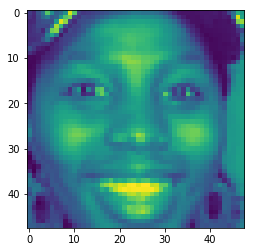

In [22]:
plt.imshow(images[2].reshape((48,48)))


In [0]:
test=np.rot90(images[2], k=0, axes= (0,1))


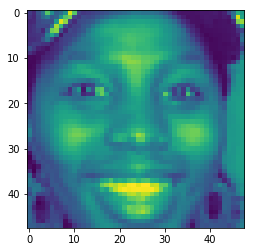

In [24]:
plt.imshow(test.reshape((48,48)))

In [0]:
images_test=[]

for i in range(len(X_test)):
    image_string = X_test[i]
    image = [int(x) for x in image_string.split()]
    image=np.array(image,dtype='float32')
    image=image.reshape((48,48,1))
    images_test.append(image)

In [0]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [0]:
y_train_hot=convert_to_one_hot(y_train,7)

In [0]:
y_test_hot=convert_to_one_hot(y_test,7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [0]:
images_train=np.array(images)


In [0]:
images_test=np.array(images_test)


In [30]:
images=np.array(images)
images_test=np.array(images_test)
images_test.reshape((10767,2304)).shape

(10767, 2304)

In [31]:
images_test.shape

(10767, 48, 48, 1)

## Model Architecture

In [32]:
from keras import regularizers
model = Sequential()
#layer1

model.add(Conv2D(64, (3, 3),padding = "same", activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.125))

#layer2

model.add(Conv2D(128, (5, 5), activation='relu',padding = "same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.125))

#layer3

model.add(Conv2D(512, (3, 3), activation='relu',padding = "same",kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.125))

#layer4

model.add(Conv2D(512, (3, 3), activation='relu',padding = "same",kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#FC1

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.125))

#FC2

model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


#FC3

model.add(Dense(7, activation='softmax'))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics = ["accuracy"])

## Summary of Model Architecture

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
__________

## Training

In [0]:
history=model.fit(images_train, y_train_hot, epochs=35, verbose=1, batch_size=128,
                                    initial_epoch=0, shuffle=False)

Epoch 1/35
25120/25120 [==============================] - 27s 1ms/step - loss: 8.7513 - acc: 0.2702
Epoch 2/35
25120/25120 [==============================] - 24s 936us/step - loss: 3.3898 - acc: 0.4157
Epoch 3/35
25120/25120 [==============================] - 23s 935us/step - loss: 2.3158 - acc: 0.4842
Epoch 4/35
25120/25120 [==============================] - 23s 931us/step - loss: 2.0436 - acc: 0.5129
Epoch 5/35
25120/25120 [==============================] - 23s 930us/step - loss: 1.9447 - acc: 0.5245
Epoch 6/35
25120/25120 [==============================] - 23s 933us/step - loss: 1.8557 - acc: 0.5404
Epoch 7/35
25120/25120 [==============================] - 23s 930us/step - loss: 1.8572 - acc: 0.5492
Epoch 8/35
25120/25120 [==============================] - 23s 932us/step - loss: 1.8528 - acc: 0.5545
Epoch 9/35
25120/25120 [==============================] - 23s 932us/step - loss: 1.8503 - acc: 0.5617
Epoch 10/35
25120/25120 [==============================] - 23s 929us/step - loss: 1.

#  Helper Functions

### For Plotting Accuracy

In [0]:

def plot_accuracy(history):
  plt.figure(figsize = (15,5))
  plt.plot(history.history['acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  
  # Plot training & validation loss values
  plt.figure(figsize=(15,5))
  plt.plot(history.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

### Accuracy and Saving the Model

In [0]:
def model_accuracy(x_test,y_test):
  scores = model.evaluate(images_test, y_test_hot, verbose=2)
  print(scores[1]*100,"%")

In [0]:
def save_model(model):
  model.save_weights("keras1.hdf5",overwrite=True)

In [0]:
y_predict = model.predict_classes(images_test, verbose=1)

10767/10767 [==============================] - 5s 474us/step


In [0]:
y_test =np.array(y_test)

In [0]:
cm = confusion_matrix(y_target=y_test, y_predicted=y_predict)

### For Plotting Confusion Matrix

In [0]:
def plot_cm(cm):
  plt.figure(figsize=(10,5))
  column = ["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]
  df_cm = pd.DataFrame(cm, index=column,columns=column)
  ax = sns.heatmap(df_cm, cmap='Oranges', annot=True,fmt='g',cbar=False,linewidths=2)

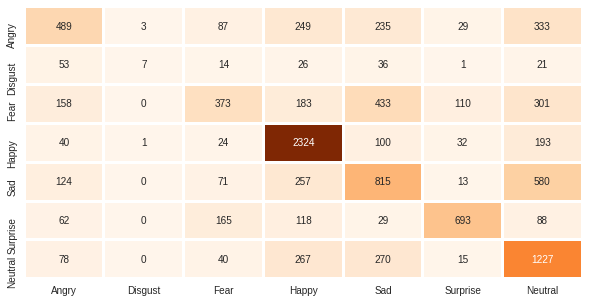

In [0]:
plot_cm(cm)

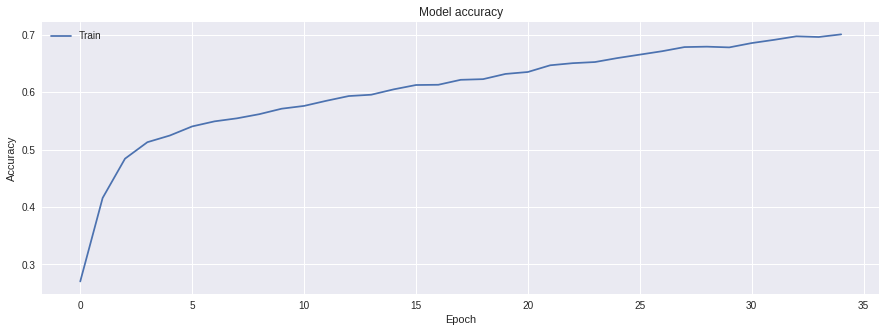

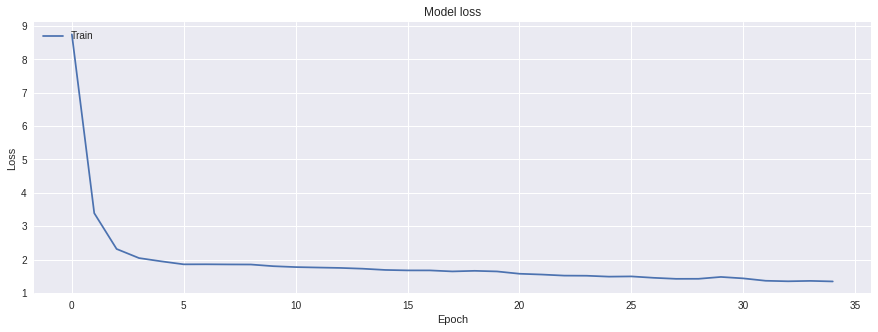

In [0]:
plot_accuracy(history)

In [0]:
model_accuracy(images_test,y_test_hot)

55.05711897547513 %
